In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from ipywidgets import interact
from IPython.display import display
import ipywidgets as widgets
sns.set()
pd.set_option("display.max_rows", None)

In [2]:
holder_df = pd.read_csv("Massachusetts_MEA_Database.csv")
df = holder_df.copy()
#df.head()

In [3]:
# Exploration of Data
## Cleaning Data

In [4]:
#df.info()

In [5]:
# Finding column headings
#df.columns.values.tolist()

In [6]:
# Changing Dates of Dataframe
df["Date"] = pd.to_datetime(df["Date"])
# Removing Unnamed and Raw Text rows
df = df.drop(['*Raw Text*',"Unnamed: 0"], axis=1)
# Replace ???s with NaN
df['Location'] = df['Location'].replace("???", np.nan)
df['Conduct'] = df['Conduct'].replace("???", np.nan)
df["Month"] = df["Date"].dt.month
#df.info()

In [7]:
# Get States
def get_States(location):
    if not pd.isnull(location):
        return location.split(" ")[-1]
    else:
        return location

df["States"] = df["Location"].apply(get_States)

In [8]:
# Clean up States
df["States"].value_counts()
df["States"]=df["States"].replace("California","CA")
df["States"]=df["States"].replace("Maryland,","MD")
df["States"]=df["States"].replace("Georgia","GA")
df["States"]=df["States"].replace("Maryland","MD")
df["States"]=df["States"].replace("Massachusetts","MA")
df["States"]=df["States"].replace("MA)","MA")
df["States"]=df["States"].replace("Ma","MA")

In [9]:
# Helper Function to split next section
def data_split(data_point):
    return data_point.split(",")
# Helper Function to return labels for single-value bar charts
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [10]:
df_entitytype = df.copy()
df_enforcement = df.copy()
df_combined = df.copy()

In [11]:
# Get Dataset split by Entity Types
df_entitytype["Entity Type"] = df_entitytype["Entity Type"].apply(data_split)
df_entitytype = df_entitytype.explode("Entity Type")
# df_entitytype.info()

In [38]:
# Get Dataset split by Enforcement Action
df_enforcement["Enforcement Action"] = df_enforcement["Enforcement Action"].apply(data_split)
df_enforcement = df_enforcement.explode("Enforcement Action")
#df_enforcement.info()

In [13]:
# Split by both
df_combined["Entity Type"] = df_combined["Entity Type"].apply(data_split)
df_combined["Enforcement Action"] = df_combined["Enforcement Action"].apply(data_split)
df_combined = df_combined.explode("Enforcement Action")
df_combined = df_combined.explode("Entity Type")
#df_combined.info()

# Analyzing Massachusetts Mortgage Enforcement Actions from 2003-2010

The focus of the investigation into the 2008 Subprime Lending Crisis and predatory lending practices has generally been centered around D.C. and Wall Street. The American Predatory Lending Data+ and Bass Connections Team is looking to expand the scope of this discussion and looking to deeper understand the diverging decisions between the federal government, various regulatory agencies and state governments.

## Massachusetts 

With a population of over 7 million according to the 2020 Census, Massachusetts is the 15th most populous state in the United States, but it is also one of the smallest states, at 7838 square miles, the 6th smallest state in the country, thus Massachusetts is one of the densest states. Massachusetts was not hit as hard by the recession, relative to other states, only losing 151300 jobs between 2007-2009 (-4.6%), and with generally more active state regulatory agencies, we might expect fewer mortgage enforcement actions. THis is indeed the case, as only 369 MEAs were issued between 2003 and 2010, although it is debatable if the low number was due to lax regulations, more scrupulous actors, or if the state maintained poor records.

In this report, we perform a macro-level analysis into general trends in the number of MEAs, the type of entities issued MEAs and the composition of MEAs issued from a dataset obtained from the Massachusetts State Government.

> For additional information about MEAs in Massachusetts, please feel free to explore the source of the data, at [Mass.gov](https://www.mass.gov/info-details/enforcement-actions-issued-by-the-division-of-banks).

In [14]:
# Count unique entities who had MEAs against them in MA
case_count = df["Entity Name"].nunique()
#print(f"There were {case_count} total unique entities that had MEAs taken out against them from 2003 to 2010.")

In [15]:
enforcement_action_list = df_enforcement["Enforcement Action"].unique().tolist()
entity_type_list = df_entitytype["Entity Type"].unique().tolist()
year_list = df["Year"].unique().tolist()
state_list = df["States"].unique().tolist()

In [16]:
enforcement_action_list_all = enforcement_action_list[:]
enforcement_action_list_all.insert(0,"All")
entity_type_list_all = entity_type_list[:]
entity_type_list_all.insert(0,"All")
year_list_all = year_list[:]
year_list_all.insert(0,"All")
state_list_all = state_list[:]
state_list_all.insert(0,"All")

## Exploring the Dataset
Below, you can find the overall dataset for Mortgage Enforcement Actions in Massachusetts from 2003-2010. Please feel free to play around with the filters, filtering for the year, state, type of entity and type of enforcement action taken.

In [49]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)


def show_data(year, entity_type, enforcement_action, checker):
    if checker:
        df_copy =df.copy()
        df_copy.rename(columns = {"URL - to be filled in":"URL","States":"State"}, inplace =True)
        df_copy=df_copy[['Date','Month','Year','Enforcement Action','Entity Name','Entity Type','Conduct','Location','State','URL']]
        if year == "All":
            pass
        else:
            df_copy = df_copy[df_copy["Year"]==year]
        if entity_type == "All":
            pass
        else:
            df_copy = df_copy[df_copy["Entity Type"].str.contains(entity_type)]
        if enforcement_action == "All":
            pass
        else:
            df_copy = df_copy[df_copy["Enforcement Action"].str.contains(enforcement_action)]
        df_copy = df_copy.style.format({'URL': make_clickable})
        display(df_copy)
    else:
        print("")
interact(
    show_data, 
    year = widgets.Dropdown(
        options=year_list_all,
        value='All',
        description='Year:',
        style = {"description_width":"initial"},
        disabled=False
), 
    enforcement_action = widgets.Dropdown(
        options=enforcement_action_list_all,
        value='All',
        description='Enforcement Action:',
        style = {"description_width":"initial"},
        disabled=False
), 
    entity_type = widgets.Dropdown(
        options=entity_type_list_all,
        value='All',
        description='Entity Type:',
        style = {"description_width":"initial"},
        disabled=False
),
checker = widgets.Checkbox(
    value=False,
    description='Show Data',
    disabled=False,
    indent=False,
    style = {"description_width":"initial"}
))

interactive(children=(Dropdown(description='Year:', options=('All', 2003, 2004, 2005, 2006, 2007, 2008, 2009, …

<function __main__.show_data(year, entity_type, enforcement_action, checker)>

### Summary Data

In [60]:
df_year = df.groupby(["Year"]).size().reset_index(name='Count')
df_year
df_month = df.groupby(["Month"]).size().reset_index(name='Count')
# df_month = df_month.sort_values(by="Count",ascending=False).reset_index(drop=True)
df_month
df_state = df.groupby(["States"]).size().reset_index(name="Count")
df_state = df_state.sort_values(by="Count",ascending=False).reset_index(drop=True)
df_ea = df_enforcement.groupby(["Enforcement Action"]).size().reset_index(name="Count")
df_ea = df_ea.sort_values(by="Count",ascending = False).reset_index(drop=True)
df_entity = df_entitytype.groupby(["Entity Type"]).size().reset_index(name="Count")
df_entity = df_entity.sort_values(by="Count",ascending = False).reset_index(drop=True)

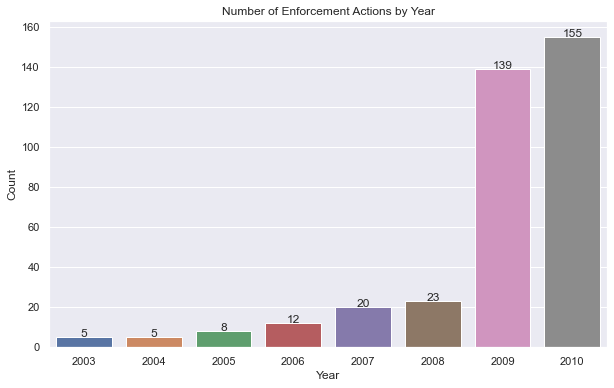

In [20]:
# Year
plt.rcParams['figure.figsize'] = (10,6)
ax1 = sns.barplot(data=df_year, x = "Year", y= "Count")
ax1.set_title("Number of Mortgage Enforcement Actions by Year")
show_values_on_bars(ax1, "v", 0.3)

The number of MEAs issued in Massachusetts increased slowly from 5 in 2003, to 23 in 2008, before spiking significantly in 2009 and 2010 to over 100 in a year. Interestingly, even in 2007 and 2008, as the subprime lending crisis began to unfold, the number of MEAs, while increasing from previous years, remained relatively low at 20 and 23 respectively. A possible reason could be that the Massachusetts State Government only really began cracking down on mortgage fraud after the financial crisis had hit its zenith, although further analysis into the distributions and contents of these MEAs is needed for more detailed conclusions to be drawn.

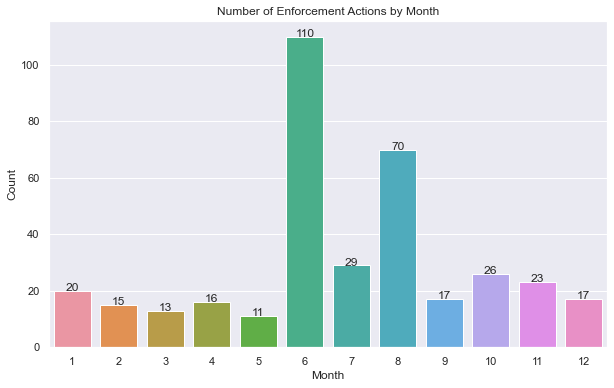

In [21]:
# Month
ax2 = sns.barplot(data=df_month, x = "Month", y= "Count",order=df_month["Month"])
ax2.set_title("Number of Mortgage Enforcement Actions by Month")
show_values_on_bars(ax2, "v", 0.3)

Interestingly, the MEAs are distributed relatively evenly across the year, with spikes in MEAs issued in June and August, although given that most MEAs were issued in 2009 and 2010, it is likely that many of the MEAs issued in June and August were from a short period during those 2 years.

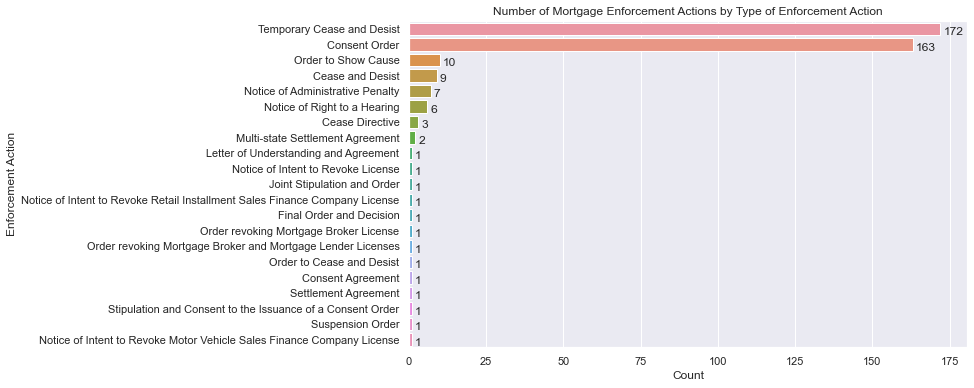

In [54]:
# Enforcement Action
ax4 = sns.barplot(data=df_ea, y = "Enforcement Action", x= "Count",order=df_ea["Enforcement Action"])
ax4.set_title("Number of Mortgage Enforcement Actions by Type of Enforcement Action")
show_values_on_bars(ax4, "h", 1)

A large majority of cases (335/385 or 87%) of MEAs are either Temporary Cease and Desist Orders or Consent Orders. This suggests that the Massachusetts State Government seemed to prefer to attack the problem directly, issuing Temporary Cease and Desist orders, or coming to a settlement with Consent Orders, as compared to tackling issues with regards to licenses.
It is interesting to note that despite there being a large number of Mortgage Loan Originators, many of whom during the financial crisis often operated without a license, only 1 Notice of Intent to Revoke License was ever issued. 

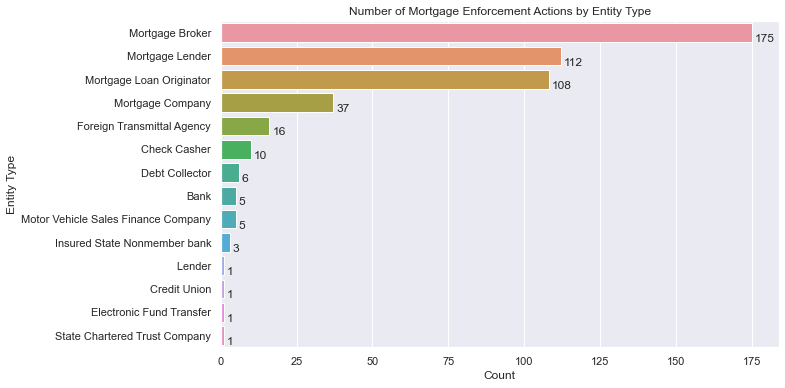

In [55]:
# Entity Type
ax5 = sns.barplot(data=df_entity, y = "Entity Type", x= "Count",order=df_entity["Entity Type"])
ax5.set_title("Number of Mortgage Enforcement Actions by Entity Type")
show_values_on_bars(ax5, "h", 1)

Most MEAs (395/481 or 82.1%) were issued to entities in 3 categories: Mortgage Brokers, Mortgage Lenders and Mortgage Loan Originators. This makes sense because these entities are often individuals, which means that there were likely to have been many more of them as compared to larger organizations like Banks or Mortgage Companies.

In [53]:
# fig, axes = plt.subplots(5, 1, figsize=(8,25))
# fig.suptitle('Summary Data Overall')

# # Year
# axes[0].set_title("Number of Enforcement Actions by Year")
# ax1 = sns.barplot(ax=axes[0],data=df_year, x = "Year", y= "Count")
# show_values_on_bars(ax1, "v", 0.3)

# # Month
# axes[1].set_title("Number of Enforcement Actions by Month")
# ax2 = sns.barplot(ax=axes[1],data=df_month, x = "Month", y= "Count",order=df_month["Month"])
# show_values_on_bars(ax2, "v", 0.3)

# # States
# axes[2].set_title("Number of Enforcement Actions by State")
# ax3 = sns.barplot(ax=axes[2],data=df_state, y = "Count", x= "States",order=df_state["States"])
# show_values_on_bars(ax3, "v", 1)

# # Enforcement Action
# axes[3].set_title("Number of Enforcement Actions by Type of Enforcement Action")
# ax4 = sns.barplot(ax=axes[3],data=df_ea, y = "Enforcement Action", x= "Count",order=df_ea["Enforcement Action"])
# show_values_on_bars(ax4, "h", 1)

# # Entity Type
# axes[4].set_title("Number of Enforcement Actions by Entity Type")
# ax5 = sns.barplot(ax=axes[4],data=df_entity, y = "Entity Type", x= "Count",order=df_entity["Entity Type"])
# show_values_on_bars(ax5, "h", 1)

In [66]:
# # Breakdown of States by Year
# df_state_year = pd.crosstab(df["States"],df["Year"])
# df_state_year_total = df_state_year.copy()
# df_state_year_total["Total"]= df_state_year.sum(axis=1)
# df_state_year_total

In [67]:
# df_state_year.T.plot(kind='line')
# plt.legend(bbox_to_anchor=(1.01, 1),
#            borderaxespad=0)
# plt.title("Breakdown of States by Years")

In [68]:
# @interact(cat = year_list)
# def plot(cat):
#     df_year_state_list = df.loc[df["Year"]==cat].groupby(["States"]).size().reset_index(name="Count")
#     df_year_state_list = df_year_state_list.sort_values(by="Count",ascending=False).reset_index(drop=True)
#     ax = sns.barplot(data=df_year_state_list,x="States",y="Count")
#     show_values_on_bars(ax, "v", 1)
#     plt.title(f"Breakdown of States in {cat}")

### Mortgage Enforcement Actions Types

In this section, we look more finely into the composition of MEAs taken during different years and display the data in multiple formats. The crosstab shows a numerical breakdown of the number of MEAs of different types issued during different years, while the line graph shows the same data more visually. The third interactive visualizations allows for a more detailed look at how the number of specific types of MEAs varied from 2003 to 2010. The fourth interactive visualization, allows for a more in-depth look at the composition of MEAs in a particular year.

In [27]:
# Breakdown of Enforcement Category by Year
df_enforcement_year = pd.crosstab(df_enforcement["Enforcement Action"],df_enforcement["Year"])
df_enforcement_year_total = df_enforcement_year.copy()
df_enforcement_year_total["Total"]= df_enforcement_year.sum(axis=1)
df_enforcement_year_total

Year,2003,2004,2005,2006,2007,2008,2009,2010,Total
Enforcement Action,,,,,,,,,
Cease Directive,0,0,0,0,0,0,1,2,3
Cease and Desist,0,1,0,1,0,2,4,1,9
Consent Agreement,0,0,0,0,0,1,0,0,1
Consent Order,1,1,6,6,4,6,18,121,163
Final Order and Decision,0,0,0,0,0,0,0,1,1
Joint Stipulation and Order,0,0,0,0,0,0,0,1,1
Letter of Understanding and Agreement,0,0,0,0,0,0,0,1,1
Multi-state Settlement Agreement,0,0,0,0,0,0,1,1,2
Notice of Administrative Penalty,0,0,0,0,0,0,0,7,7


Text(0.5, 1.0, 'Breakdown of Enforcement Action Type by Year')

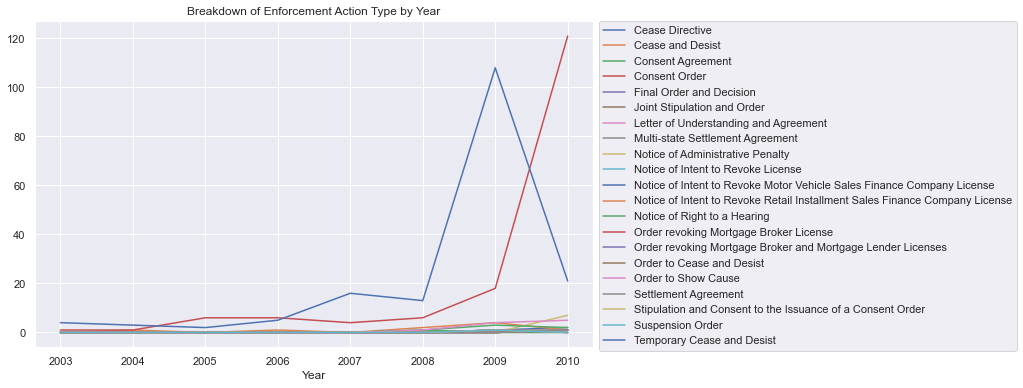

In [81]:
df_enforcement_year.T.plot(kind='line')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Breakdown of Enforcement Action Type by Year")

In [83]:
def plot(cat):
    df_ea_year_list = df_enforcement.loc[df_enforcement["Enforcement Action"]==cat].groupby(["Year"]).size().reset_index(name="Count")
    ax = sns.barplot(data=df_ea_year_list,x="Year",y="Count")
    show_values_on_bars(ax, "v", 1)
    plt.title(f"Number of {cat}s by Year")
interact(plot, cat = widgets.Dropdown(
    options=enforcement_action_list,
    value='Temporary Cease and Desist',
    description='Enforcement Action Type:',
    style = {"description_width":"initial"},
    disabled=False
))

interactive(children=(Dropdown(description='Enforcement Action Type:', options=('Temporary Cease and Desist', …

<function __main__.plot(cat)>

In [77]:
def plot(cat):
    df_year_ea_list = df_enforcement.loc[df_enforcement["Year"]==cat].groupby(["Enforcement Action"]).size().reset_index(name="Count")
    df_year_ea_list = df_year_ea_list.sort_values(by="Count",ascending=False).reset_index(drop=True)
    ax = sns.barplot(data=df_year_ea_list,y="Enforcement Action",x="Count")
    show_values_on_bars(ax, "h", 0.1)
    plt.title(f"Breakdown of Mortgage Enforcement Action Types for {cat}")
interact(plot, cat = widgets.Dropdown(
    options=year_list,
    value=2003,
    description='Year:',
    style = {"description_width":"initial"},
    disabled=False
))

interactive(children=(Dropdown(description='Year:', options=(2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010), …

<function __main__.plot(cat)>

While Consent Orders and Temporary Cease and Desists were the most common types of MEAs to be issued, there are interesting differences in how they were issued over the 2003-2010 period. Both types of MEAs were generally the most common MEA types issued from 2003 to 2008, indicating a general preference of the Massachusetts State Government towards these two types of MEAs, with Temporary Cease and Desists usually more commonly issued. In 2009, while both the number of Consent Orders and Temporary Cease and Desists increased to 18 and 108 respectively, the spike in Temporary Cease and Desists was much larger. In 2010, the pattern reversed, with the number of Consent Orders spiking to 121 and the number of Temporary Cease and Desists falling to 21. This suggests a reversal in the strategy of the Massachusetts State Government in dealing with the mortgage crisis, preferring to negotiate with entities and issuing Consent Orders as opposed to trying to stem the bleeding with issuing mass Temporary Cease and Desists. To understand this pattern further, it would be important to look at the type of entities that were being issued Consent Orders and Temporary Cease and Desists.

### Entity Types
In this section, we look more finely into the types of entities issued MEAs during different years and display the data in multiple formats. The crosstab shows a numerical breakdown of the number of MEAs issued to different entity types during different years, while the line graph shows the same data more visually. The third interactive visualizations allows for a more detailed look at how the number of specific entity types issued MEAs varied from 2003 to 2010. The fourth interactive visualization, allows for a more in-depth look at the composition of entities in a particular year.

In [31]:
# Breakdown of Entity Type by Year
df_entity_year = pd.crosstab(df_entitytype["Entity Type"],df_entitytype["Year"])
df_entity_year_total = df_entity_year.copy()
df_entity_year_total["Total"]= df_entity_year.sum(axis=1)
df_entity_year_total

Year,2003,2004,2005,2006,2007,2008,2009,2010,Total
Entity Type,,,,,,,,,
Lender,0,0,0,0,0,0,0,1,1
Bank,0,0,0,0,0,0,3,2,5
Check Casher,0,0,0,0,0,1,8,1,10
Credit Union,0,0,0,0,0,0,0,1,1
Debt Collector,0,0,1,1,0,0,2,2,6
Electronic Fund Transfer,0,0,0,0,0,0,1,0,1
Foreign Transmittal Agency,0,0,1,2,0,2,4,7,16
Insured State Nonmember bank,0,1,0,0,0,1,0,1,3
Mortgage Broker,5,4,6,9,12,15,100,24,175


Text(0.5, 1.0, 'Breakdown of Entity Types by Years')

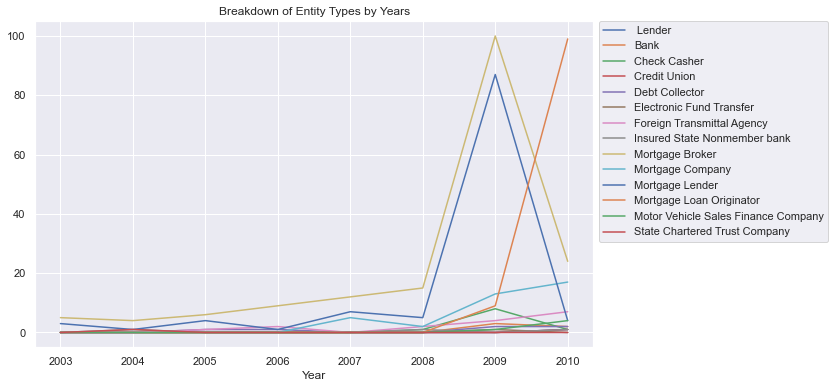

In [32]:
df_entity_year.T.plot(kind='line')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Breakdown of Entity Types by Year")

In [79]:
def plot(cat):
    df_entity_year_list = df_entitytype.loc[df_entitytype["Entity Type"]==cat].groupby(["Year"]).size().reset_index(name="Count")
    ax = sns.barplot(data=df_entity_year_list,x="Year",y="Count")
    show_values_on_bars(ax, "v", 1)
    plt.title(f"Number of {cat}s by Year")
interact(plot, cat = widgets.Dropdown(
    options=entity_type_list,
    value='Mortgage Broker',
    description='Entity Type:',
    style = {"description_width":"initial"},
    disabled=False
))

interactive(children=(Dropdown(description='Entity Type:', options=('Mortgage Broker', 'Mortgage Lender', 'Ins…

<function __main__.plot(cat)>

In [75]:
def plot(cat):
    df_year_entity_list = df_entitytype.loc[df_entitytype["Year"]==cat].groupby(["Entity Type"]).size().reset_index(name="Count")
    df_year_entity_list = df_year_entity_list.sort_values(by="Count",ascending=False).reset_index(drop=True)
    ax = sns.barplot(data=df_year_entity_list,y="Entity Type",x="Count")
    show_values_on_bars(ax, "h", 0.1)
    plt.title(f"Breakdown of Enforcement Action Types for {cat}")

interact(plot, cat = widgets.Dropdown(
    options=year_list,
    value=2003,
    description='Year:',
    style = {"description_width":"initial"},
    disabled=False
))

interactive(children=(Dropdown(description='Year:', options=(2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010), …

<function __main__.plot(cat)>

As mentioned earlier, Mortgage Brokers, Mortgage Lenders and Mortgage Loan Originators make up the bulk of entities issued MEAs. We see that the number of Mortage Brokers and Mortage Lenders issued MEAs increased from 2003 to 2009, and during this period, these two entity types consistently had the highest number of MEAs issued in any given year. However, in 2010, there was a sharp spike in the number of Mortgage Loan Originators who were issued MEAs, rising to 99. Coupled with a similar pattern seen in the number of Temporary Cease and Desists and Consent Orders seen previously, this may suggest that the Massachusetts State Government not only switched up its strategies in the type of MEAs issued, but also in the types of entities targeted. The need for a more conclusive analysis motivates the next section.

### Mortgage Enforcement Action Types and Entity Types
The pattern from the previous two sections necessitated a more in-depth look at the types of MEAs that were issued to different entity types, which is the purpose of the following interactive visualization.

In [80]:
def plot(cat):
    df_combined_copy = df_combined
    df_combined_list = df_combined_copy.loc[df_combined_copy["Entity Type"] ==cat]
    ax_combined = sns.countplot(data=df_combined_list, y="Enforcement Action",order=df_combined_list["Enforcement Action"].value_counts().index)
    show_values_on_bars(ax_combined, "h", 0.1)
    plt.title(f"Breakdown of Enforcement Action Types for {cat}")

interact(plot, cat = widgets.Dropdown(
    options=entity_type_list,
    value='Mortgage Broker',
    description='Entity Type:',
    style = {"description_width":"initial"},
    disabled=False
))

interactive(children=(Dropdown(description='Entity Type:', options=('Mortgage Broker', 'Mortgage Lender', 'Ins…

<function __main__.plot(cat)>

Here we can see that the similar patterns we saw in both the types of MEAs issued and entity types issued MEAs in 2009 and 2010 were primarily because of the shift in focus for the Massachusetts State Government in focusing on Mortgage Loan Originators in 2010 instead of Mortgage Lenders or Mortgage Brokers. As we can see here, the large majority of MEAs issued to Mortgage Loan Originators were Consent Orders (95/111 or 85.6%), while the majority of MEAs issued to Mortgage Brokers (130/182 or 71.4%) and Mortgage Lenders (101/112 or 90.2%) were Temporary Cease and Desists.

In [69]:
# df_state_entity = df_entitytype.copy()
# df_state_entity.dropna(subset = ["States"], inplace=True)
# state_entity_type_list = df_state_entity["Entity Type"].unique().tolist()


# def plot(cat):
    
#     df_state_entity_list = df_state_entity.loc[df_state_entity["Entity Type"] ==cat]
#     #df_state_entity_list.dropna(subset = ["States"],inplace = True)
#     ax = sns.countplot(data=df_state_entity_list, y="States",order=df_state_entity_list["States"].value_counts().index)
#     show_values_on_bars(ax, "h", 0.1)
#     plt.title(f"Breakdown of States for {cat}s")

# interact(plot, cat = widgets.Select(
#     options=state_entity_type_list,
#     value='Mortgage Broker',
#     description='Entity Types:',
#     style = {"description_width":"initial"},
#     disabled=False
# ))